# Visualization Tools

We have included several visualizations that we have found useful through our development and use of the package. In this demo we will go through how to extend some of the ones we have already used through the webinar so that they can be adapted for more applications. It's worth noting that all of our plots are [matplotlib](https://matplotlib.org/)-compliant, so making changes or updates to the figures even after they are generated should be possible and easy.

In [35]:
# Fix PROJ path ---------------------------------------------------------------
import os; 
os.environ['PROJ_LIB']=r'/opt/conda/pkgs/proj-9.2.1-ha5fc9e9_0/share/proj'
# Load libraries --------------------------------------------------------------
from glob import glob
import numpy as np
import pandas as pd
from os import path
import MGSurvE as srv
import matplotlib.pyplot as plt
# Setup data path and ID ------------------------------------------------------
(ID, OUT_PTH) = ('visualization', './out/')
srv.makeFolder(OUT_PTH)

## Plotting Trap Attractiveness Kernels

For now, plotting our traps attractiveness kernels involves generating a landscape and calling the `srv.plotTrapsKernels` method. Let's define three different traps:

In [2]:
# Defining a dummy landscape --------------------------------------------------
pts = pd.DataFrame({'x': [0, 1], 'y': [0, 1], 't': [0, 0]})
points = pd.DataFrame(pts, columns=('x', 'y', 't'))
# Traps info ------------------------------------------------------------------
nullPos = [0, 0, 0]
traps = pd.DataFrame({'x': nullPos, 'y': nullPos, 't': nullPos, 'f': nullPos})
tKer = {
    0: {
        'kernel': srv.exponentialAttractiveness,
        'params': {'A': 1, 'k': .01, 's': .3, 'gamma': .975, 'epsilon': 0}
    },
    1: {
        'kernel': srv.exponentialDecay, 
        'params': {'A': 0.5, 'b': 0.045}
    },
    2: {
        'kernel': srv.sigmoidDecay,     
        'params': {'A': 1, 'rate': .175, 'x0': 25}
    }
}
TCOL = {
    0: '#f7258515', 1: '#fe5f5515', 2: '#5ddeb125', 
    3: '#f038ff15', 4: '#e2ef7015', 5: '#9381ff15', 
}

And plot their profiles. Note that we are adding axis labels and changing the font sizes as we would do with any [matplotlib](https://matplotlib.org/) figure:

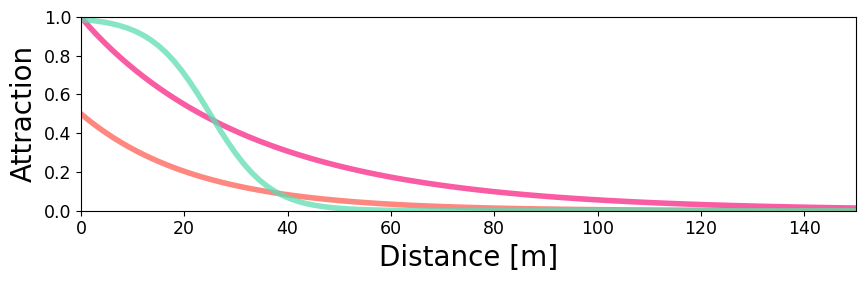

In [3]:
lnd = srv.Landscape(points, traps=traps, trapsKernels=tKer)
(fig, ax) = plt.subplots(1, 1, figsize=(10, 10), sharey=False)
(fig, ax) = srv.plotTrapsKernels(
    fig, ax, lnd, 
    colors=TCOL, distRange=(0, 150), aspect=.25
)
ax.set_xlabel('Distance [m]', fontsize=20)
ax.set_ylabel('Attraction', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12.5)
fig.savefig(
    path.join(OUT_PTH, 'TrapKernels.png'), 
    facecolor='w', bbox_inches='tight', pad_inches=0.1, dpi=300
)

## Plotting Lanscapes

### Euclidean

### Globe

## GA Performance

Checking the performance of our GA system can be done as we would do with any other optimization application thanks to the fact that we would usually export the algorithm's evolution to a `CSV` file. To show this in action we will make use of one of the examples from our [preprint](https://www.biorxiv.org/content/10.1101/2023.06.26.546301v1). We will take the results from the optimization of the São Tomé landscape and plot the GA evolution over generations.

First, we will setup our paths and filename-related variables so that we can load the files easily. We ran the experiment for 10 repetitions with 5, 10, 15, and 20 traps; which are part of the filename differentiators:

In [58]:
# Experiment ID and statistic used --------------------------------------------
(ID, ST) = ('STPD', 'man')
TRP_NUM = ['05', '10', '15', '20']
# Setup paths and filename pattern --------------------------------------------
(PTH_DTA, FHEAD) = ('../../data/', f'{ID}-{ST}')
FP_PTRN = path.join(PTH_DTA, FHEAD+'_{}*.csv')

We will now create two dictionaries:
* `FNAMES`: stores the repetition filenames in order (value), for each one of the traps numbers (key)
* `GA_MIN`: contains the GA evolution array (value) where each row is a repetition of the optimization, for each one of the traps numbers (key)

In [43]:
FNAMES = {trp: sorted(glob(FP_PTRN.format(trp))) for trp in TRP_NUM}
GA_MIN = {
    trp: np.array([
        pd.read_csv(rep)['min'].values 
        for rep in FNAMES[trp]
    ]) for trp in TRP_NUM
}

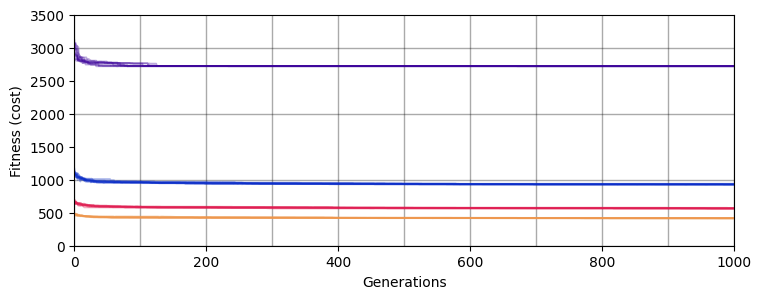

In [57]:
(XRAN, YRAN) = ((0, 1000), (0, 3500))
(COLS, ALPHA) = (['#390099', '#072ac8', '#e01a4f', '#ee964b'], '55')
(fig, ax) = plt.subplots(figsize=(25, 3))
for (ix, trp) in enumerate(TRP_NUM):
    ax.plot(GA_MIN[trp].T, color=COLS[ix]+ALPHA, lw=1.25)
ax.set_aspect(1/10)
ax.set_xlim(0, XRAN[1])
ax.set_ylim(YRAN[0], YRAN[1])
ax.set_xlabel('Generations')
ax.set_ylabel('Fitness (cost)')
ax.vlines(np.arange(XRAN[0], XRAN[1]+20, 100),  YRAN[0], YRAN[1], color='#00000055', lw=1, zorder=-10)
ax.hlines(np.arange(YRAN[0], YRAN[1]+25, 1000), XRAN[0], XRAN[1], color='#00000055', lw=1, zorder=-10)
